In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [13]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [15]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [16]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [17]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

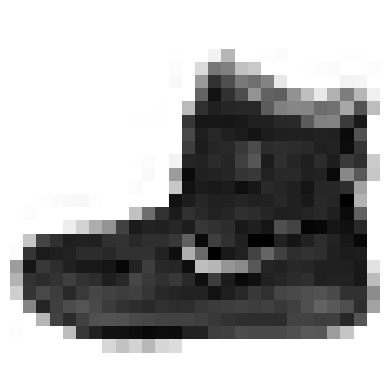

In [18]:
# extra code
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [19]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [21]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

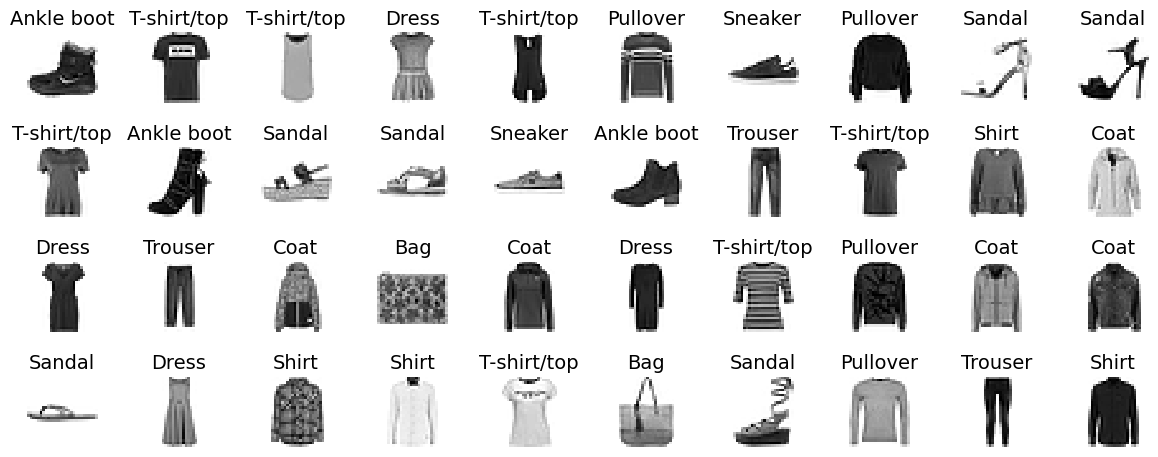

In [22]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

### Creating the model using the Sequential API

In [23]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [24]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
model.layers

In [28]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03913394, -0.05097132,  0.00180466, ...,  0.00052774,
         0.05484279,  0.04345836],
       [-0.04060028, -0.0567597 , -0.01147478, ..., -0.03711123,
        -0.04477261, -0.03370221],
       [ 0.03049219,  0.00747714, -0.0345482 , ..., -0.00519118,
         0.06257764,  0.07041243],
       ...,
       [-0.01391985, -0.01953092,  0.03156158, ...,  0.01441804,
         0.01660229, -0.04326358],
       [ 0.02671792,  0.01023377, -0.02419374, ..., -0.03869148,
         0.07307248, -0.04214367],
       [-0.03724197, -0.06451041, -0.04418597, ..., -0.0535641 ,
         0.01837124, -0.02217993]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

### Compiling the model

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [35]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [36]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set num_classes when the number of classes is greater than the maximum class id in the sample.

In [40]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

### Training and evaluating the model

In [41]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2023-09-07 16:26:42.946266: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7039 - sparse_categorical_accuracy: 0.7665 - val_loss: 0.5040 - val_sparse_categorical_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4837 - sparse_categorical_accuracy: 0.8332 - val_loss: 0.4541 - val_sparse_categorical_accuracy: 0.8378
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4375 - sparse_categorical_accuracy: 0.8472 - val_loss: 0.4211 - val_sparse_categorical_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4130 - sparse_categorical_accuracy: 0.8559 - val_loss: 0.3934 - val_sparse_categorical_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3922 - sparse_categorical_accuracy: 0.8629 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3754 - sparse_categoric

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


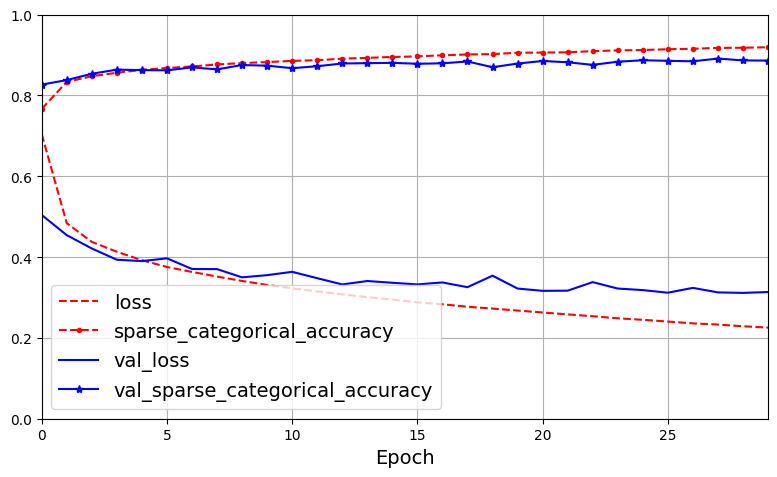

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

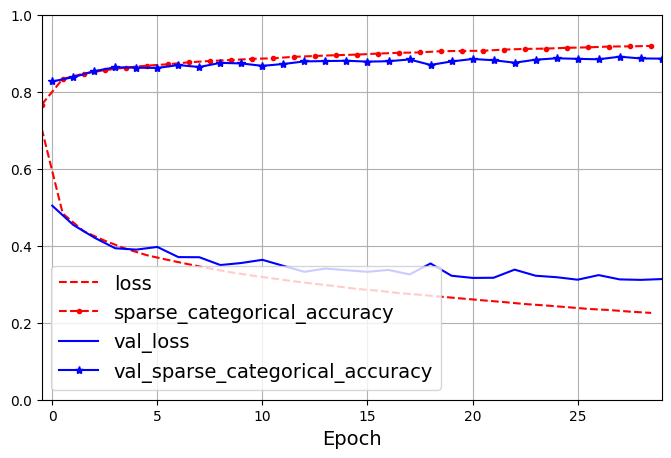

In [45]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3264 - sparse_categorical_accuracy: 0.8835


[0.32636260986328125, 0.8834999799728394]

### Using the model to make predictions

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 113ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [48]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [50]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

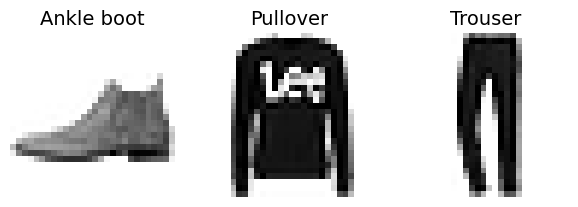

In [51]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [55]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9497 - root_mean_squared_error: 0.9745 - val_loss: 0.3854 - val_root_mean_squared_error: 0.6208
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3891 - root_mean_squared_error: 0.6238 - val_loss: 2.1597 - val_root_mean_squared_error: 1.4696
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3712 - root_mean_squared_error: 0.6092 - val_loss: 0.3293 - val_root_mean_squared_error: 0.5738
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3406 - root_mean_squared_error: 0.5836 - val_loss: 0.6901 - val_root_mean_squared_error: 0.8307
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3300 - root_mean_squared_error: 0.5745 - val_loss: 1.5604 - val_root_mean_squared_error: 1.2491
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3342 - root_mean_squared_error: 0.5781 - val_loss: 1.2631 - val_

In [56]:
rmse_test

0.5338489413261414

In [57]:
y_pred

array([[0.3977738],
       [1.1799092],
       [5.001514 ]], dtype=float32)

## Building Complex Models Using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see paper) connects all or part of the inputs directly to the output layer.

In [58]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [59]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [61]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1967 - root_mean_squared_error: 1.0940 - val_loss: 1.4371 - val_root_mean_squared_error: 1.1988
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4851 - root_mean_squared_error: 0.6965 - val_loss: 1.7779 - val_root_mean_squared_error: 1.3334
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4191 - root_mean_squared_error: 0.6473 - val_loss: 0.8257 - val_root_mean_squared_error: 0.9087
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3755 - root_mean_squared_error: 0.6128 - val_loss: 1.0212 - val_root_mean_squared_error: 1.0105
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3644 - root_mean_squared_error: 0.6037 - val_loss: 2.5732 - val_root_mean_squared_error: 1.6041
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3656 - root_mean_squared_error: 0.6047 - val_loss: 2.8552 - val_

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [62]:
tf.random.set_seed(42)  # extra code

In [63]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0160 - root_mean_squared_error: 1.0080 - val_loss: 1.2833 - val_root_mean_squared_error: 1.1328
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4665 - root_mean_squared_error: 0.6830 - val_loss: 0.7683 - val_root_mean_squared_error: 0.8765
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4215 - root_mean_squared_error: 0.6492 - val_loss: 0.4155 - val_root_mean_squared_error: 0.6446
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3996 - root_mean_squared_error: 0.6321 - val_loss: 0.3778 - val_root_mean_squared_error: 0.6147
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3920 - root_mean_squared_error: 0.6261 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3729 - root_mean_squared_error: 0.6106 - val_loss: 0.4624 - val_

Adding an auxiliary output for regularization:

In [65]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [66]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [68]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.6660 - dense_2_loss: 1.6136 - dense_3_loss: 2.1374 - dense_2_root_mean_squared_error: 1.2703 - dense_3_root_mean_squared_error: 1.4620 - val_loss: 1.1401 - val_dense_2_loss: 0.7089 - val_dense_3_loss: 5.0212 - val_dense_2_root_mean_squared_error: 0.8419 - val_dense_3_root_mean_squared_error: 2.2408
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6176 - dense_2_loss: 0.5966 - dense_3_loss: 0.8063 - dense_2_root_mean_squared_error: 0.7724 - dense_3_root_mean_squared_error: 0.8979 - val_loss: 0.9720 - val_dense_2_loss: 0.7085 - val_dense_3_loss: 3.3438 - val_dense_2_root_mean_squared_error: 0.8417 - val_dense_3_root_mean_squared_error: 1.8286
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5048 - dense_2_loss: 0.4919 - dense_3_loss: 0.6209 - dense_2_root_mean_squared_error: 0.7014 - dense_3_root_mean_squared_error: 0.7880 - val_loss: 0.5136 - val_dense_2_loss

In [69]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 2ms/step - loss: 0.3290 - dense_2_loss: 0.3224 - dense_3_loss: 0.3886 - dense_2_root_mean_squared_error: 0.5678 - dense_3_root_mean_squared_error: 0.6234


In [70]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 93ms/step


In [71]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 45ms/step


## Using the Subclassing API to Build Dynamic Models

In [72]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [73]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.6475 - output_1_loss: 1.6042 - output_2_loss: 2.0372 - output_1_root_mean_squared_error: 1.2666 - output_2_root_mean_squared_error: 1.4273 - val_loss: 0.7061 - val_output_1_loss: 0.6744 - val_output_2_loss: 0.9922 - val_output_1_root_mean_squared_error: 0.8212 - val_output_2_root_mean_squared_error: 0.9961
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5251 - output_1_loss: 0.5001 - output_2_loss: 0.7505 - output_1_root_mean_squared_error: 0.7072 - output_2_root_mean_squared_error: 0.8663 - val_loss: 2.2619 - val_output_1_loss: 2.4068 - val_output_2_loss: 0.9576 - val_output_1_root_mean_squared_error: 1.5514 - val_output_2_root_mean_squared_error: 0.9786
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4571 - output_1_loss: 0.4444 - output_2_loss: 0.5715 - output_1_root_mean_squared_error: 0.6667 - output_2_root_mean_squared_error: 0.7560 - val_loss: 0.554

## Saving and Restoring a Model

In [74]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [75]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [76]:
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [77]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 114ms/step


In [78]:
model.save_weights("my_weights")

In [79]:
model.load_weights("my_weights")

In [80]:
# extra code – show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks

In [81]:
shutil.rmtree("my_checkpoints", ignore_errors=True)  # extra code

In [82]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 0.3685 - output_1_loss: 0.3596 - output_2_loss: 0.4487 - output_1_root_mean_squared_error: 0.5997 - output_2_root_mean_squared_error: 0.6698 - val_loss: 0.3336 - val_output_1_loss: 0.3235 - val_output_2_loss: 0.4245 - val_output_1_root_mean_squared_error: 0.5688 - val_output_2_root_mean_squared_error: 0.6515
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3508 - output_1_loss: 0.3428 - output_2_loss: 0.4223 - output_1_root_mean_squared_error: 0.5855 - output_2_root_mean_squared_error: 0.6499 - val_loss: 0.5589 - val_output_1_loss: 0.5698 - val_output_2_loss: 0.4607 - val_output_1_root_mean_squared_error: 0.7549 - val_output_2_root_mean_squared_error: 0.6787
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3558 - output_1_loss: 0.3486 - output_2_loss: 0.4208 - output_1_root_mean_squared_error: 0.5905 - output_2_root_mean_squared_error: 0.6487 - val_loss: 0.341

In [83]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3334 - output_1_loss: 0.3270 - output_2_loss: 0.3911 - output_1_root_mean_squared_error: 0.5718 - output_2_root_mean_squared_error: 0.6254 - val_loss: 0.6431 - val_output_1_loss: 0.6509 - val_output_2_loss: 0.5729 - val_output_1_root_mean_squared_error: 0.8068 - val_output_2_root_mean_squared_error: 0.7569
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3396 - output_1_loss: 0.3334 - output_2_loss: 0.3948 - output_1_root_mean_squared_error: 0.5775 - output_2_root_mean_squared_error: 0.6284 - val_loss: 0.4059 - val_output_1_loss: 0.4022 - val_output_2_loss: 0.4390 - val_output_1_root_mean_squared_error: 0.6342 - val_output_2_root_mean_squared_error: 0.6626
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3310 - output_1_loss: 0.3251 - output_2_loss: 0.3843 - output_1_root_mean_squared_error: 0.5701 - output_2_root_mean_squared_error: 0.6199 - val_loss: 1.

In [84]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [85]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.14
Epoch=1, val/train=1.08
Epoch=2, val/train=1.01
Epoch=3, val/train=1.37
Epoch=4, val/train=1.51
Epoch=5, val/train=1.22
Epoch=6, val/train=2.04
Epoch=7, val/train=2.89
Epoch=8, val/train=2.16
Epoch=9, val/train=1.16


## Using TensorBoard for Visualization